# Data Visualization for Exploration

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

#ggplot equivalent: plotnine
from plotnine import *

#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *

#widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#utility
import utils
def clean_comma(x): return float(str(x).replace(',',''))
df = pd.read_csv('data/taladrod.csv')
df['sales_price'] = df.sales_price.map(clean_comma)
df['market_price'] = df.market_price.map(clean_comma)
df.head()

,id,brand,series,model,gen,year,color,gear,gas,sales_price,original_price,market_price,description,contact_location,subscribers,scraped_date,removed_date
0,2210000,HONDA,JAZZ,1.5 i-VTEC SV (AS),ปี08-13,2014.0,สีขาว,เกียร์ออโต้,NaN,488000.0,NaN,NaN,"เครดิตดีออกรถ10,000จบครับ\nรับประกันเครื่องเกี...",กรุงเทพฯ,1047.0,2019-05-22,NaN
1,2210001,TOYOTA,ESTIMA,2.4 G HYBRID,ปี10-ปัจจุบัน,2013.0,สีขาว,เกียร์ออโต้,NaN,1677000.0,NaN,3050000.0,TOPสุด Estima Aeras Hybrid รถเข้าเซอร์วิส TOYO...,กรุงเทพฯ,182.0,2019-05-22,NaN
2,2210009,HONDA,JAZZ,1.5 i-VTEC V (AS),ปี08-13,2008.0,สีน้ำเงิน,เกียร์ออโต้,NaN,338000.0,NaN,NaN,"เครดิดีออกรถ10,000จบครับ\nรับประกันเครื่องเกีย...",กรุงเทพฯ,1047.0,2019-05-22,NaN
3,2210012,FORD,RANGER,2.2 WILDTRAK DBL CAB HI-RIDER,DOUBLECAB,2016.0,สีขาว,เกียร์ออโต้,NaN,689000.0,NaN,849000.0,รับรองสภาพ ไม่มีชน มือเดียว พาช่างมาตรวจสภาพรถ...,กรุงเทพฯ,760.0,2019-05-22,NaN
4,2210016,TOYOTA,SOLUNA,VIOS 1.5 E (ABS+AB),VIOS ปี13-ปัจจุบัน,2015.0,สีบรอนซ์เงิน,เกียร์ออโต้,NaN,359000.0,NaN,649000.0,"ไมล์แท้ 99,xxx TOYOTA SOLUNA VIOS 1.5E\nTOYOTA...",กรุงเทพฯ,699.0,2019-05-22,NaN


## Data Quality

### Missing Values

In [2]:
missing = utils.check_missing(df)
missing['over90'] = missing.per_missing.map(lambda x: True if x>0.9 else False)
missing

,col_name,per_missing,rnk,over90
0,original_price,0.991380,00_original_price,True
1,gas,0.936525,01_gas,True
2,removed_date,0.886728,02_removed_date,False
3,market_price,0.561658,03_market_price,False
4,subscribers,0.000641,04_subscribers,False
5,model,0.000000,05_model,False
6,gen,0.000000,06_gen,False
7,year,0.000000,07_year,False
8,color,0.000000,08_color,False
9,gear,0.000000,09_gear,False


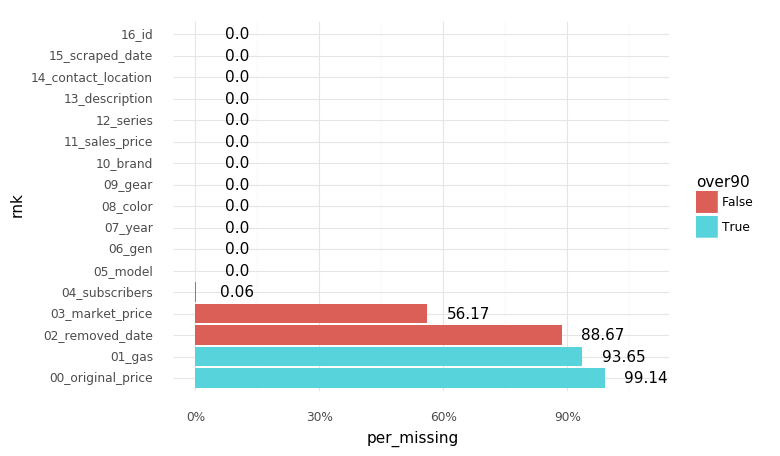

<ggplot: (-9223363276175385070)>

In [3]:
g = (ggplot(missing,aes(x='rnk',y='per_missing',fill='over90')) + #base plot
     geom_col() + #type of plot 
     geom_text(aes(x='rnk',y='per_missing+0.1',label='round(100*per_missing,2)')) +#annotate
     scale_y_continuous(labels=percent_format()) + #y-axis tick
     theme_minimal() + coord_flip()#theme and flipping plot
    )
g

### Popular Values

In [4]:
df = utils.otherify(df,'brand')

In [5]:
interact(utils.value_dist, df =fixed(df),
         col = widgets.Dropdown(options=list(df.columns),value='gas'))

interactive(children=(Dropdown(description='col', index=8, options=('id', 'brand', 'series', 'model', 'gen', '…

<function utils.value_dist(df, col)>

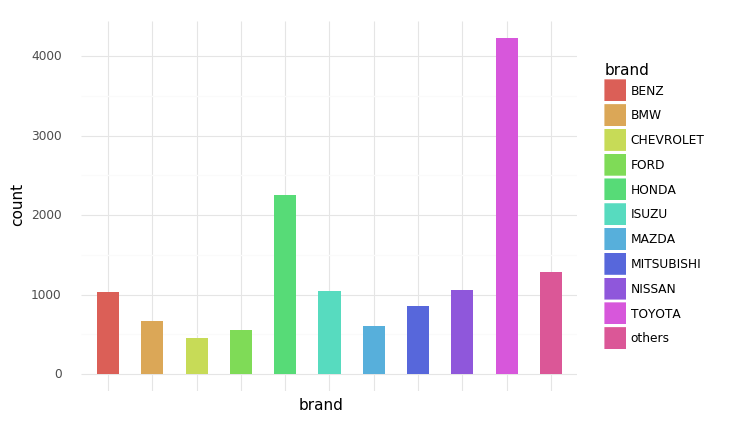

<ggplot: (8760743847004)>

In [6]:
g = (ggplot(df,aes(x='brand',fill='brand')) + 
     geom_bar(stat='bin', #histogram
              binwidth=0.5, #histogram binwidth
              bins=len(df.brand.unique())) + #how many bins
     theme_minimal() + theme(axis_text_x=element_blank())
    )
g

## Numerical Variables

In [7]:
import datetime
now = datetime.datetime.now()
df['nb_year'] = now.year - df['year']
num_vars = ['nb_year','sales_price','market_price','subscribers']
num_df = df[num_vars].dropna() #this is why you need to deal with missing values BEFORE exploration
num_df.describe()

,nb_year,sales_price,market_price,subscribers
count,6150.000000,6.150000e+03,6.150000e+03,6150.000000
mean,4.512195,7.320714e+05,1.333557e+06,525.634959
std,2.026358,7.745356e+05,1.288468e+06,386.841217
min,0.000000,2.000000e+04,3.690000e+05,1.000000
25%,3.000000,3.590000e+05,6.490000e+05,191.250000
50%,5.000000,4.990000e+05,8.770000e+05,423.000000
75%,6.000000,7.790000e+05,1.445000e+06,772.000000
max,8.000000,1.299000e+07,1.645000e+07,1469.000000


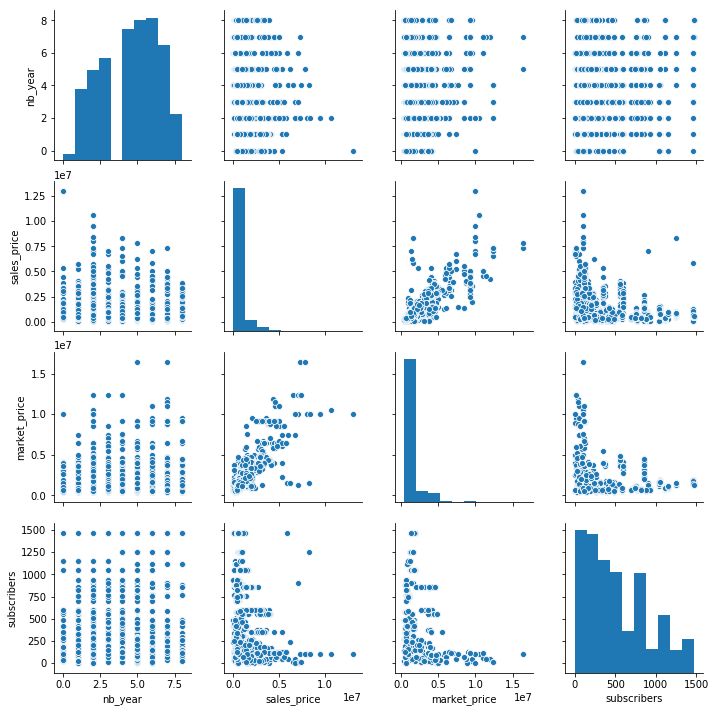

In [8]:
import seaborn as sns
sns.pairplot(num_df) #non-normal data is a problem!

**Q-Q plot** compares two probability distributions by plotting their quantiles against each other. We can use this to determine the normality of a variable by plotting the sample quantiles (from the data we have) against its theoretical quantiles (where the quantiles would be if the variable is normally distributed).

In [9]:
interact(utils.qq_plot, df=fixed(num_df),
         col=widgets.Dropdown(options=list(num_df.columns)))

interactive(children=(Dropdown(description='col', options=('nb_year', 'sales_price', 'market_price', 'subscrib…

<function utils.qq_plot(df, col)>

**Box-Cox transformation** is a statistical technique used to make data look like more normally distributed.

\begin{align}
g_\lambda(y) = \left\{
\begin{array}{lr}\displaystyle\frac{y^\lambda - 1}{\lambda} &  \lambda \neq 0\\
        & \\
       \log(y) &  \lambda = 0
     \end{array}
   \right.
\end{align}

In [10]:
def boxcox(ser,lamb=0):
    pass
#input a column from pandas dataframe
#output transformed column

In [11]:
#see transformation results
def what_lamb(df,col,lamb):
    sample_df = df.copy()
    former_g = utils.qq_plot(sample_df,col)
    sample_df[col] = utils.boxcox(sample_df[col],lamb)
    print(utils.qq_plot(sample_df,col),former_g)
    
interact(what_lamb, df=fixed(num_df),
         col=widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         lamb=widgets.FloatSlider(min=-3,max=3,step=0.5,value=0)
         )

interactive(children=(Dropdown(description='col', index=1, options=('nb_year', 'sales_price', 'market_price', …

<function __main__.what_lamb(df, col, lamb)>

We can also automate finding $\lambda$ by plotting the coefficient of the Q-Q plot, and choose lambda where the coefficient is closest to 1.

In [12]:
lamb_df = utils.boxcox_lamb_df(num_df.subscribers)
interact(utils.boxcox_plot, df=fixed(num_df),
         col=widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         ls=fixed([i/10 for i in range(-30,31,5)])
         )

interactive(children=(Dropdown(description='col', index=1, options=('nb_year', 'sales_price', 'market_price', …

<function utils.boxcox_plot(df, col, ls=[-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])>

In [14]:
#transform sales and market prices
for col in ['sales_price','market_price']:
    num_df['new_'+col] = utils.boxcox(num_df[col], utils.boxcox_lamb(num_df[col]))

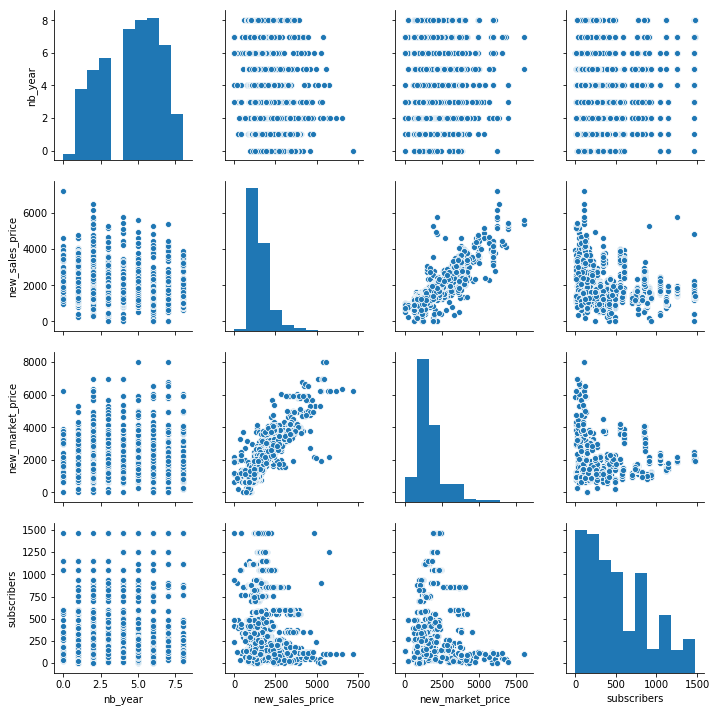

In [17]:
sns.pairplot(num_df[['nb_year','new_sales_price','new_market_price','subscribers']]) #a little better!

In case there are too many pairs, you might want to look at their distributions and correlations pair-by-pair.

In [18]:
num_m = num_df.melt()
num_m.head()

,variable,value
0,nb_year,6.0
1,nb_year,3.0
2,nb_year,4.0
3,nb_year,4.0
4,nb_year,7.0


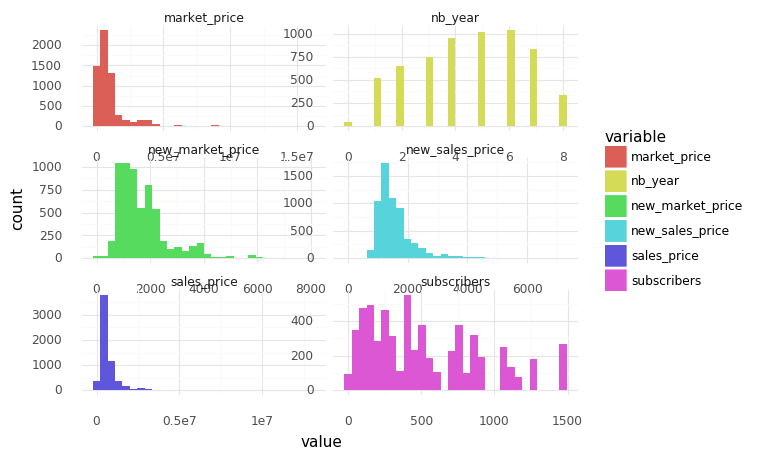

<ggplot: (8760649170068)>

In [19]:
g = (ggplot(num_m,aes(x='value',fill='variable')) +
     geom_bar(stat='bin', bins=30) +
     facet_wrap('~variable', scales='free',ncol=2) + #facetting by variable
     theme_minimal()
    )
g

In [20]:
def jointplot(df,col_x, col_y):
    return sns.jointplot(df[col_x],df[col_y])
interact(jointplot, df=fixed(num_df),
         col_x= widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         col_y=widgets.Dropdown(options=list(num_df.columns),value='sales_price'))

interactive(children=(Dropdown(description='col_x', index=1, options=('nb_year', 'sales_price', 'market_price'…

<function __main__.jointplot(df, col_x, col_y)>

In [24]:
#correlation plot if you must; but it's just ONE number for the relationship
num_df.corr(method='pearson').style.background_gradient(cmap='coolwarm') 

,nb_year,sales_price,market_price,subscribers,new_sales_price,new_market_price
nb_year,1,-0.220633,-0.00786656,0.163404,-0.275434,-0.0152819
sales_price,-0.220633,1,0.862739,-0.07795,0.955499,0.819534
market_price,-0.00786656,0.862739,1,-0.063786,0.858924,0.948289
subscribers,0.163404,-0.07795,-0.063786,1,-0.0165204,0.039791
new_sales_price,-0.275434,0.955499,0.858924,-0.0165204,1,0.882803
new_market_price,-0.0152819,0.819534,0.948289,0.039791,0.882803,1


In [38]:
def pearson_corr(x,y):
    sub_x = x - x.mean()
    sub_y = y - y.mean()
    return (sub_x * sub_y).sum() / np.sqrt((sub_x**2).sum() * (sub_y**2).sum())

#spearman and kendall: pearson with rank variables
pearson_corr(df.nb_year,df.sales_price)

-0.23316757399518453

**Bottom line**: It's always better to LOOK at your data instead of relying on ONE number for each relationship.

## Categorical Variables